# Part I - Investigating the Flight Data In 2007 from the Bureau of Transportation Statistics
## by Chidiebere Chukwuemeka

## Introduction
> The dataset under consideration is from the Bureau of Transportation Statistics. The dataset contains information on time performance of flights. The dataset is for consideration will only cover the year 2007 and can be downloaded directly from their website. The description is posted on their website in detail.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> We have been able to import neccesary packages


In [2]:
# Importing the 2007 flight dataset
flight_df = pd.read_csv("2007.csv")

In [3]:
flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [5]:
flight_df["Month"].value_counts()

8     653279
7     648560
3     639209
5     631609
10    629992
6     629280
1     621559
4     614648
12    614139
11    605149
9     600187
2     565604
Name: Month, dtype: int64

In [6]:
flight_df["DayOfWeek"].value_counts()

1    1112474
5    1101689
4    1097738
3    1088858
2    1078562
7    1040556
6     933338
Name: DayOfWeek, dtype: int64

In [7]:
flight_df["CancellationCode"].value_counts()

A    66779
B    61936
C    31995
D       39
Name: CancellationCode, dtype: int64

# Cleaning

>converting the month and DayOfWeek to strings 

In [8]:
#Converting to strings
flight_df[["DayOfWeek"]] = flight_df[["DayOfWeek"]].astype("string")
flight_df[["Month"]] = flight_df[["Month"]].astype("string")

In [9]:
#Converting the numerical equivalent of months using the replace function
flight_df["Month"] = flight_df["Month"].replace({
        "1": "Jan",
        "2": "Feb",
        "3": "Mar",
        "4": "Apr",
        "5": "May",
        "6": "Jun",
        "7": "Jul",
        "8": "Aug",
        "9": "Sep",
        "10": "Oct",
        "11": "Nov",
        "12": "Dec"
})

In [10]:
#Converting the numerical equivalent of week using the replace function
flight_df["DayOfWeek"] = flight_df["DayOfWeek"].replace({
        "1": "Mon",
        "2": "Tue",
        "3": "Wed",
        "4": "Thu",
        "5": "Fri",
        "6": "Sat",
        "7": "Sun"
})



In [11]:
#Converting flight cancellation
flight_df["CancellationCode"] = flight_df["CancellationCode"].replace({
    "A": "Carrier",
    "B": "Weather",
    "C": "National Air System",
    "D": "Security"
})

In [12]:
#Using the rename function to change CancellationCode to Cancellation since it no longer is a Coded feature
flight_df.rename(index = int, columns={"CancellationCode" : "Cancellation"}, inplace = True)

In [13]:
#Converting to strings again
flight_df[["DayOfWeek"]] = flight_df[["DayOfWeek"]].astype('string')
flight_df[["Month"]] = flight_df[["Month"]].astype('string')

In [14]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              string 
 2   DayofMonth         int64  
 3   DayOfWeek          string 
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  Cancellation       object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [15]:
#Making a copy of the original data collected
flight_clean = flight_df.copy()

In [16]:
#Describe the cleaned dataset
flight_clean.describe()

,Year,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,7.452221e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,1.572589e+01,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,1.272502e+02,1.028159e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,8.781154e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,7.035750e+01,6.824577e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,8.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,7.700000e+01,5.500000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,1.600000e+01,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,1.100000e+02,8.400000e+01,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,2.300000e+01,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,1.560000e+02,1.310000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,3.100000e+01,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,1.430000e+03,1.257000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


> This description gives an overview of the numerical variables in the cleaned data. This is important because it shows how the data changes from its minimum to maximum state.

### What is the structure of your dataset?

> The 2007 Flight dataset contains 7453215 entries and 29 columns(representing features in the dataset).

### What is/are the main feature(s) of interest in your dataset?

> The main interest in my dataset will be to understand why or the major causes of flight cancelations and delays. We shall explore characteristics of trips made and what insights the company would need to improve their system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of interest will be the `Month`, `Distance`, `TaxiIn`,`TaxiOut`, `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `LateAircraftDelay`, `AirTime`, `ArrDelay`, `DepDelay`, `Cancellation`. We can use this to get insights that are neccessary for the research.

In [17]:
# In other to stop repeated codes we can automate some parts of the codes such as the title and labels going forward

def plot_label(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)

In [18]:
# for color in the data set
base_color = sns.color_palette()[3]

#data quering cancelations
flight_canc = flight_clean.query('Cancellation in ["Carrier", "Weather", "National Air System", "Security"]')

#for indexing
weekday = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
month = ["Jan", "Feb", "Mar","Apr", "May","Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"]

## Univariate Exploration


### Question One: What were the Reasons for flight cancellations in 2007?

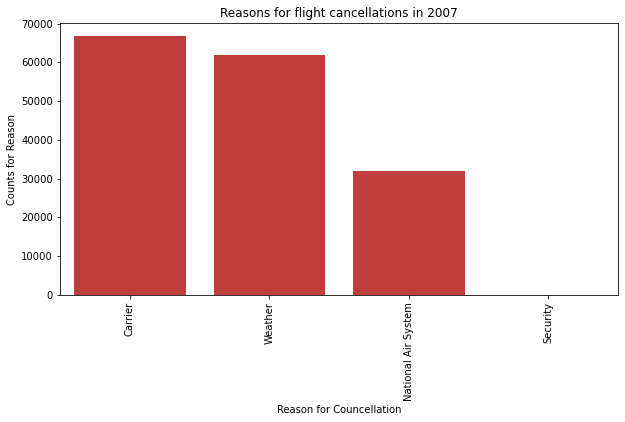

In [19]:
#bar plot using seaborn
plt.figure(figsize = [10, 5])
sns.countplot(data = flight_clean, x = "Cancellation", color = base_color)
plot_label("Reasons for flight cancellations in 2007", "Reason for Councellation", "Counts for Reason")
plt.show()

> The plot above displays values for the reasons made for flights cancelled in 2007. Cancellation made because of `Carrier(s)` had the most followed by `Weather`, `National Air System` and `Security` respectively

### Question Two: What month(s) in 2007 had the highest flight activity and number of cancelations?

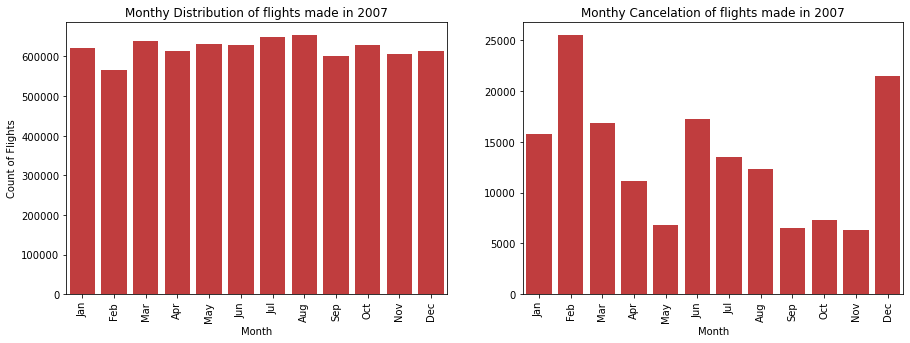

In [20]:
# using Seaborn to create a bar plot
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = flight_clean, x = "Month", color = base_color, order = month)
plot_label("Monthy Distribution of flights made in 2007", "Month", "Count of Flights")

plt.subplot(1, 2, 2)
sns.countplot(data = flight_canc, x = "Month", color = base_color, order = month)
plot_label("Monthy Cancelation of flights made in 2007", "Month", "")

plt.show()

> From the count plot above, their seem to be a very close range between the top three months with most flights. Also the August holiday period seem to have the highest flights counts as people will tend to spend the long holiday relaxing in diferent locations. Its also noticable that December was amongst the buttom four as I myself was expecting higher travels during that period in the calender. #wow

### What month(s) had the highest number of cancelations?

> From the plot above there were more cancellations in Febuary although having the least activities in 2007.

### Question Three: What Day of the Week had the most flight activity and higher number of cancellation?

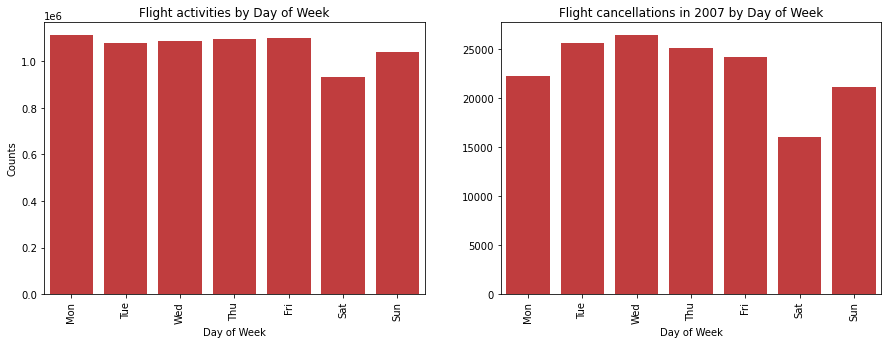

In [21]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = flight_clean, x = "DayOfWeek", color = base_color, order = weekday)
plot_label("Flight activities by Day of Week", "Day of Week", "Counts")

plt.subplot(1, 2, 2)
sns.countplot(data = flight_canc, x = "DayOfWeek", color = base_color, order = weekday)
plot_label("Flight cancellations in 2007 by Day of Week", "Day of Week", "")

plt.show()

> `Monday` had the highest flight activity followed by `Friday` and `Thursday` in 2007.

### What Day of the Week had the higher number of cancellation?

> The second plot confirms that `Wednesday` had the most flight cancellations from the 2007 data collected.

### Question Four: What is the distibution of the Distance in miles covered by the flights?

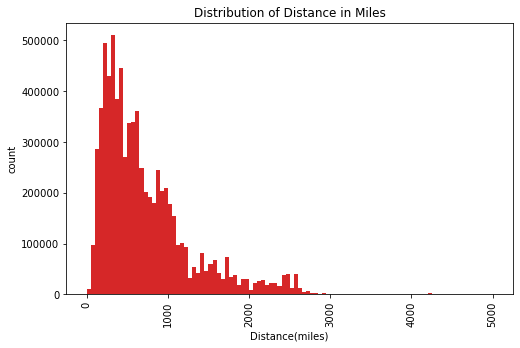

In [22]:
#Plotting the values of the Distance
binsize = 50
bin_edges = np.arange(0, flight_clean["Distance"].max()+binsize, binsize)


plt.figure(figsize = [8, 5])
plt.hist(data = flight_clean, x = "Distance", color = base_color, bins = bin_edges)
plot_label("Distribution of Distance in Miles", "Distance(miles)", "count")
plt.show()

> From the histogram above one can see the larger bars concentrating on the right hand side of the plot. Thus we can say the distribution is skewed towards the right. This also shows that the distribution is not normal and would require a log transform to show the the distribution proper.

> When our original continuous data(Distaance) do not follow the bell curve, we can log transform the data to make it as “normal” as possible so that the statistical analysis results from this data become more valid . In other words, the log transformation reduces or removes the skewness of our original data

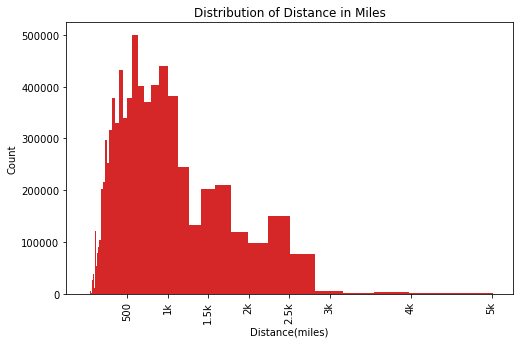

In [23]:
log_binsize = 0.05
bin_edges = 10 ** np.arange(0, np.log10(flight_clean["Distance"].max())+log_binsize, log_binsize)


plt.figure(figsize = [8, 5])
plt.hist(data = flight_clean, x = "Distance", color = base_color, bins = bin_edges)
plot_label("Distribution of Distance in Miles", "Distance(miles)", "Count")
plt.xticks([500, 1e3, 1500, 2e3, 2500, 3e3, 4e3, 5e3], [500, "1k", "1.5k", "2k", "2.5k", "3k", "4k", "5k"])
plt.show()

> The Log transform was plotted and shows that majority of the flights had a low distance coverage and the data is unimodal because it has only one peak around the 500miles distance covered then it begins to go down.

### Question Five: What is the distribution of the Arrival and Departure delays?

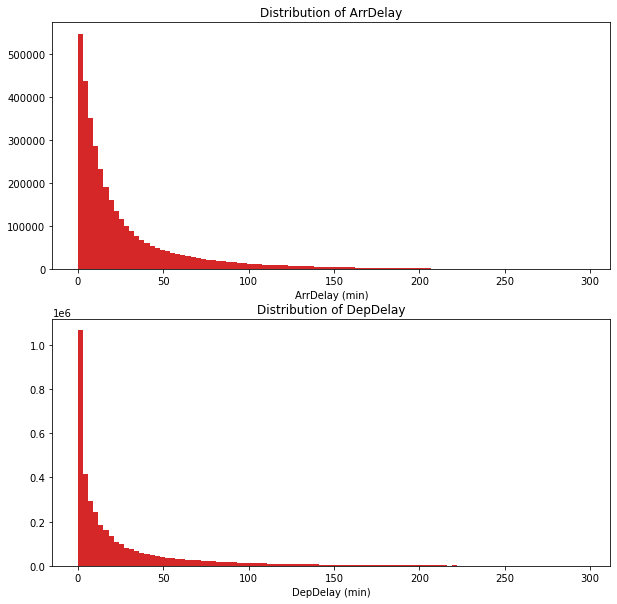

In [24]:
fig, ax = plt.subplots(nrows = 2, figsize = [10, 10])

delay_variables = ["ArrDelay", "DepDelay"]
for i in range(len(delay_variables)):
    var = delay_variables[i]
    bins = np.arange(0, 300, 3)
    ax[i].hist(data = flight_clean, x = var, bins = bins, color = base_color)
    ax[i].set_xlabel('{} (min)'.format(var))
    ax[i].set_title("Distribution of {}".format(var))


plt.show()

> It is interesting to note the similarity in the plots for arrival delays and departure delays. Both plots are skewed to the right to a great degree. The graph of both arival and departure delays were both unimodal as majority delays were below 50mins.

### Question Six: What is the distribution of the TaxiIn and TaxiOut?

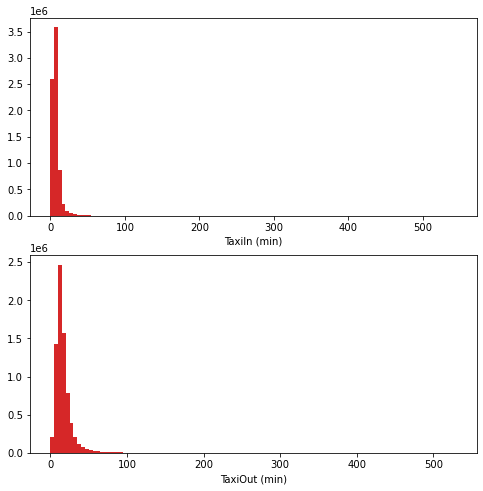

In [25]:
fig, ax = plt.subplots(nrows = 2, figsize = [8, 8])

taxi_variables = ["TaxiIn", "TaxiOut"]
for i in range(len(taxi_variables)):
    var = taxi_variables[i]
    bins = np.arange(min(flight_clean[var]), max(flight_clean[var])+5, 5)
    ax[i].hist(data = flight_clean, x = var, bins = bins, color = base_color)
    ax[i].set_xlabel('{} (min)'.format(var))

plt.show()

>Just like in the previous distribution, the distribution of the Taxi in time and the Taxi Out time is skewed to the right and not normal. This implies that we might need a log transform in later on.. fingers crossed...

### Question Seven: What is the distribution of the Flight Airtime?

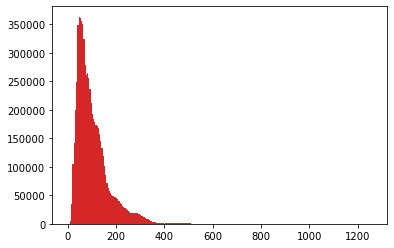

In [26]:
binsize = 5
bin_edges=np.arange(0, flight_clean["AirTime"].max()+binsize, binsize)
plt.hist(data = flight_clean, x = "AirTime", color = base_color, bins = bin_edges)


plt.show()

> Same with the above distribution the flight airtime is skewed to the right.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variable of interest was the Distance covered by flights. The distribution was seen to be skewed to the right and required a log transformation where we had to show areas of concentration as majority of flights had a low mile coverage of less than 2500 miles.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To explore the `Month`, `DayOfWeek` and `Cancellation` data we had to modify them to fit the appropriate string equivalent for easy reading.

## Bivariate Exploration

> To delve in deep we shall find the relationship(correlation) between `Distance`, `AirTime`, `TaxiIn`, `TaxiOut`, `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `LateAircraftDelay`, `ArrDelay` and `DepDelay`. These features covers the delay varibles and distance and time of flight as well as Taxi time. 

### Question Eight: What is the relationship and trends beween the varables under consideration?
> Due to the weight of the dataset, we will focus on just 5000 samples for a clean plot.

In [27]:
#Creating a data fram for the numerical and categorical variables add also working with only 5000 samples from the very large pool of data
numeric_vars = ["Distance", "AirTime", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "SecurityDelay", "LateAircraftDelay", "ArrDelay", "DepDelay"]
numeric_delay = ["ArrDelay", "DepDelay"]

categoric_vars = ["Month", "DayOfWeek", "Cancellation"]

flight_clean_sample = flight_clean.sample(n = 5000, replace = False)

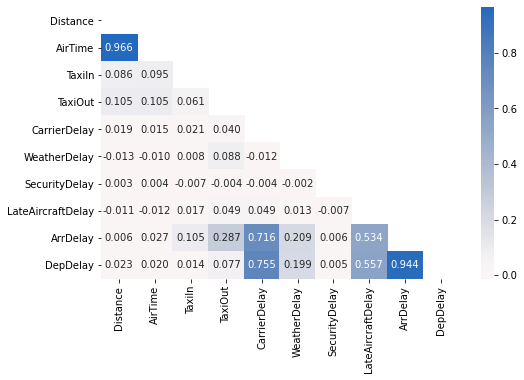

In [28]:
#correlation plot
plt.figure(figsize = [8, 5])

d = flight_clean_sample[numeric_vars].corr()
mask = np.zeros_like(d)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(d, annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0, mask = mask)
plt.show()

flight_clean_sample.shape (5000, 29)


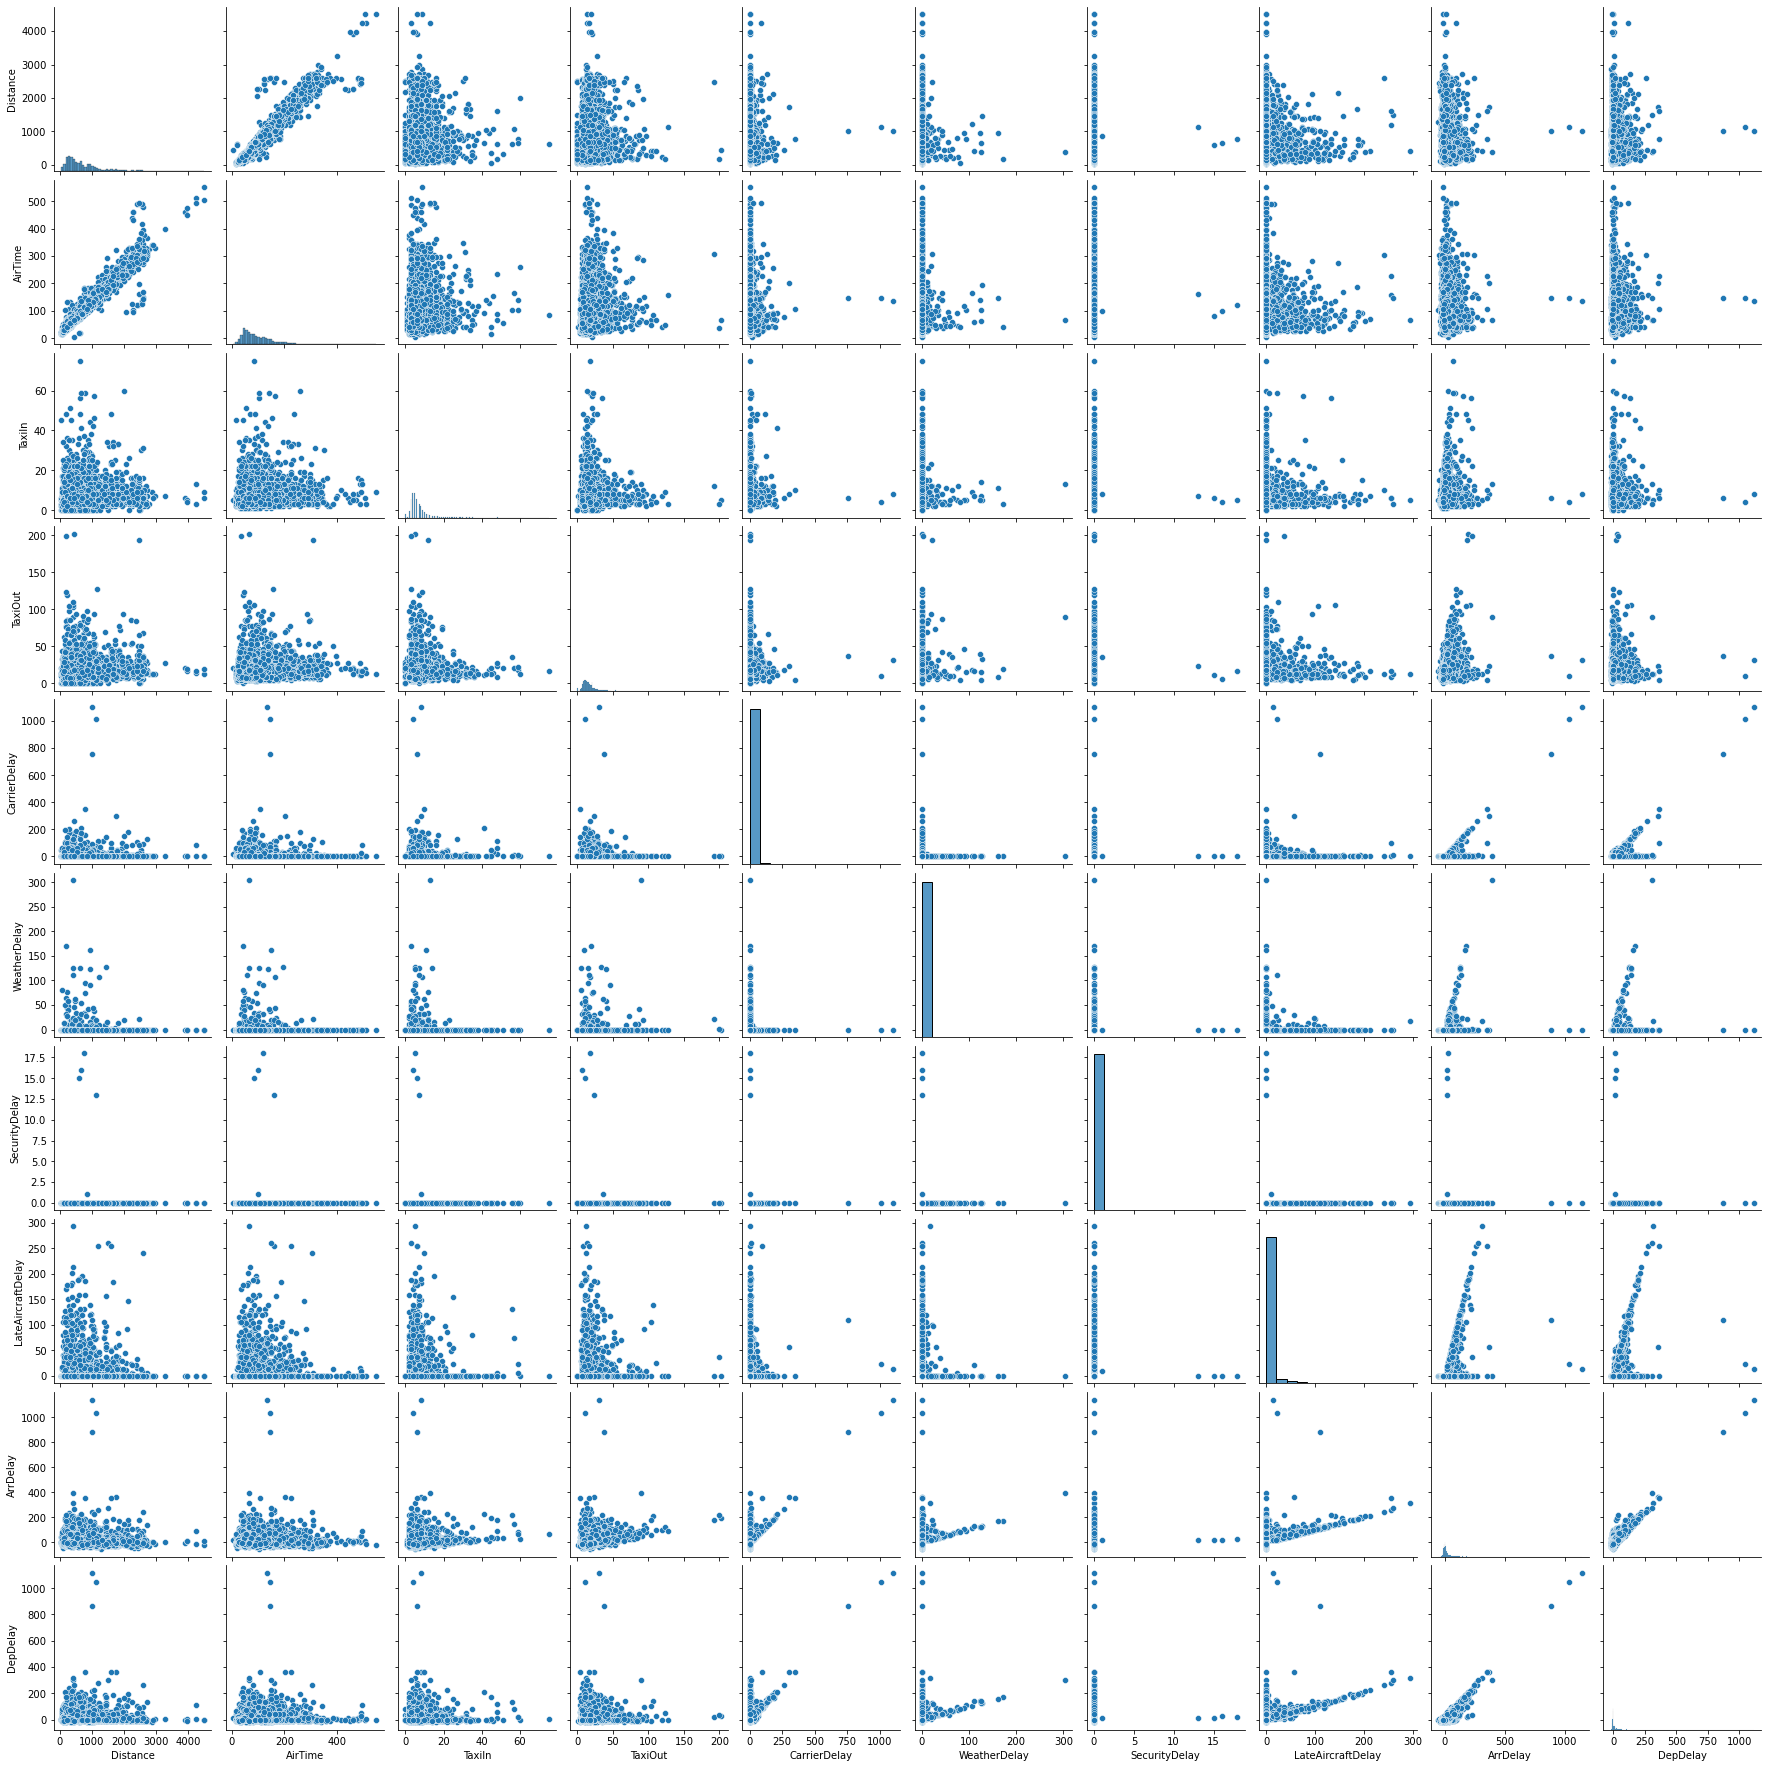

In [29]:
# pairplot
sns.pairplot(flight_clean_sample, vars = numeric_vars)
print("flight_clean_sample.shape",  flight_clean_sample.shape)
plt.show()

> From the two plots above, the relationship between the Distance and Airtime of flights were seen to be near perfect as `r = ~0.9+`. This is corroborated by the pairplot as the thin straight line is seen on the plot.

> There were also noticable positive corellation between Arival and Depature delay as `r = ~0.9+` as the pairplot(scatterplot) also confirms this.

>Late Air Craft Delay also had a positive corelation with Arival `r = ~0.6`and Depature delay `r = ~0.6`.

### Question Nine: What is the relationship between Arrival and Depature delays on fights Weekly, and Monthly?

<Figure size 3600x1440 with 0 Axes>

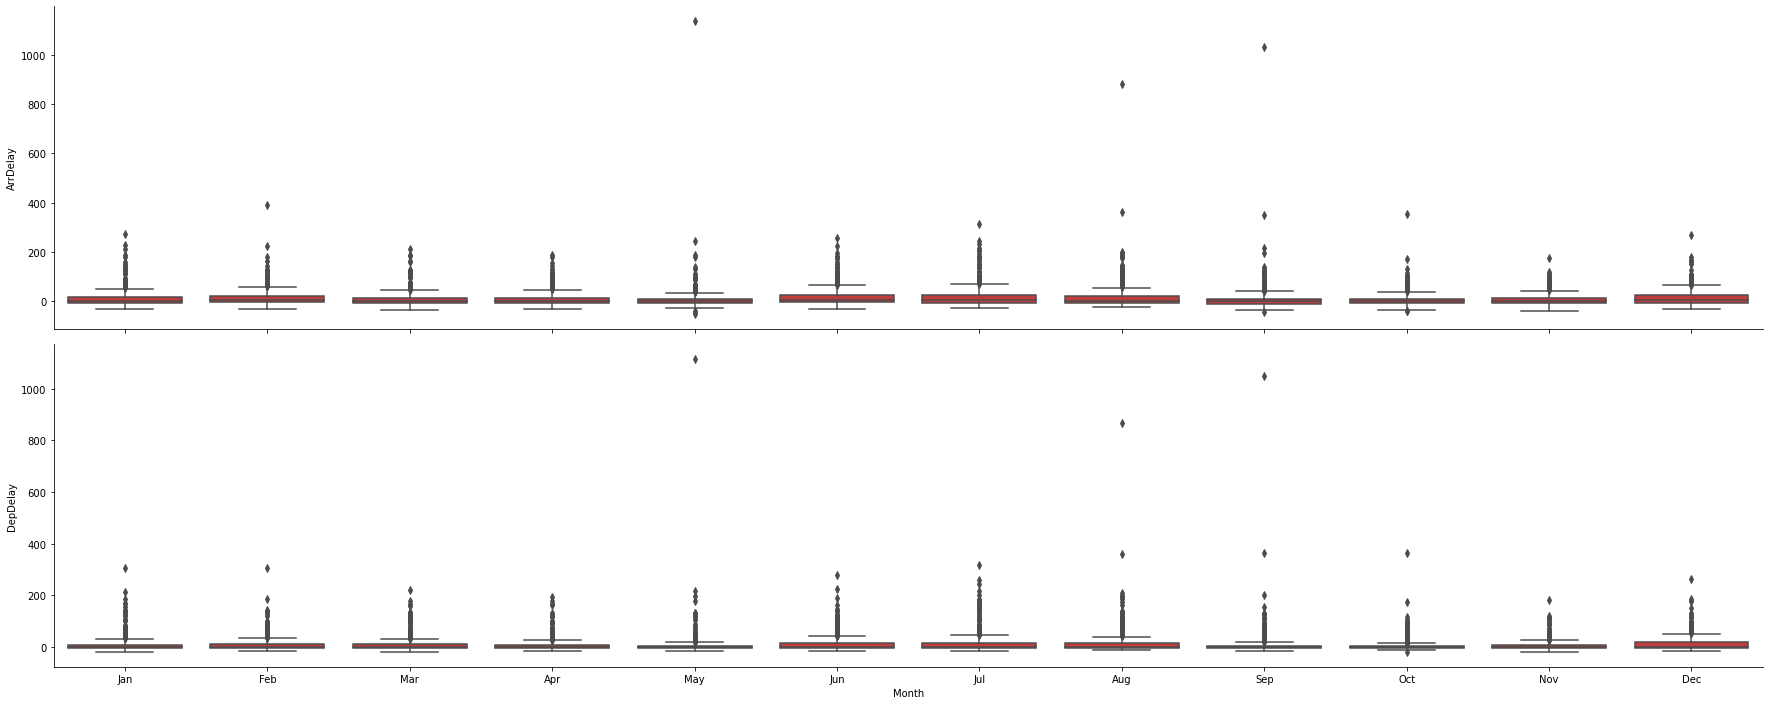

In [30]:
weekday = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
month = ["Jan", "Feb", "Mar","Apr", "May","Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"]
#Boxplot
def boxgrid(x, y, **kwargs):
    sns.boxplot(x = x, y = y, color = base_color, order = month)
    

plt.figure(figsize = [50, 20])
c = sns.PairGrid(data = flight_clean_sample, y_vars = numeric_delay, x_vars = "Month",
                height = 5, aspect = 5)

c.map(boxgrid)

plt.show();

> Although representative of a small portion of the data. There seem to be good number of outliers on the Monthly arrival and depature delays. The montly data shows an inconsistent movement across different month with variying median.

<Figure size 3600x1440 with 0 Axes>

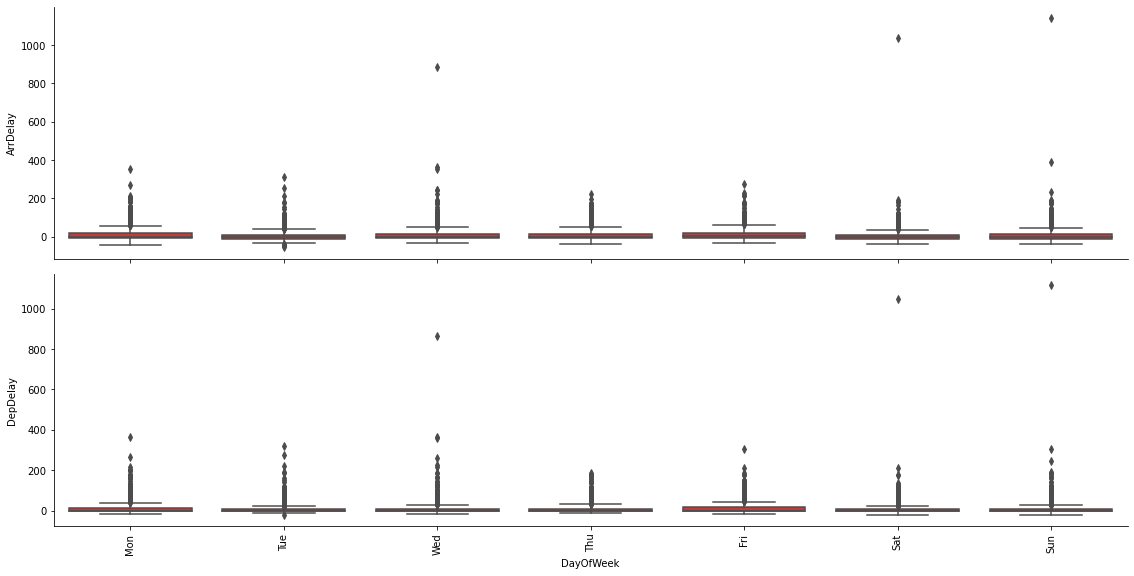

In [31]:
#Boxplot for weekly arival and departure delays
def boxgrid(x, y, **kwargs):
    plot_label("", "", "")
    sns.boxplot(x = x, y = y, color = base_color, order =weekday)

plt.figure(figsize = [50, 20])
c = sns.PairGrid(data = flight_clean_sample, y_vars = numeric_delay, x_vars = "DayOfWeek",
                height = 4, aspect = 4)
c.map(boxgrid)
plt.show();

> The weekly arivale and depature delays shows an inconsistent movement across different month with variying median. Flights made on saturdays have lower median which implies lower delays when compared to other weekdays.

### Question Ten: What is the relationship between between Distance and the Categorical Variables?

> We shall now focus on the log distance of the categorical variables.

In [32]:
# we shall plot the categorical variable Month against the log distance variable

# function to create a logarithm of distance
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

#log distance
flight_clean['log_dist'] = flight_clean['Distance'].apply(log_trans)

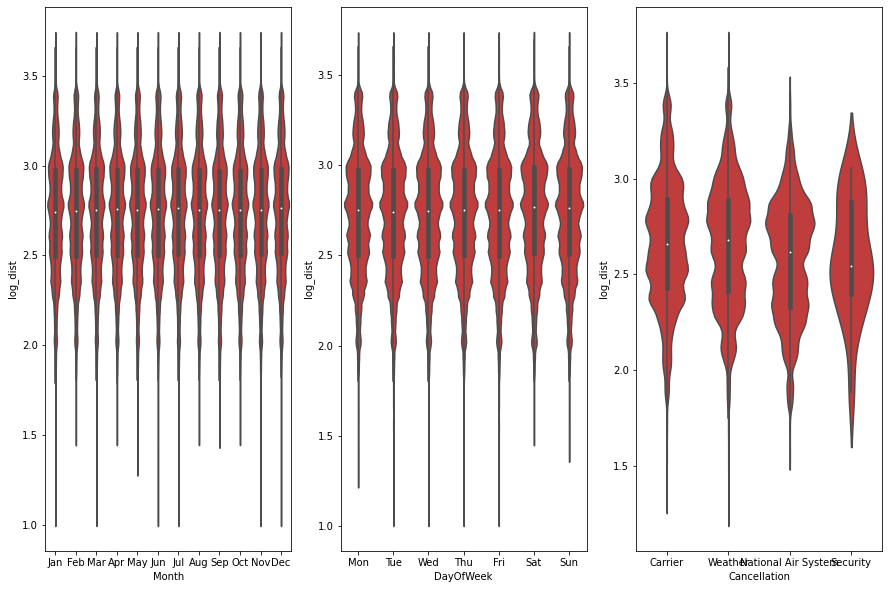

In [33]:
fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = flight_clean, x = var, y = 'log_dist', ax = ax[i],
               color = base_color)
plt.show()

> The violin plot on the categorical variables of interest and the transformed distance is clearer than the initial box plot earlier. The plot however show a decreasing distances across cancellation issues.

### Question Eleven: What is the relationship between Departure and Arrival Delay when flights are not cancelled?

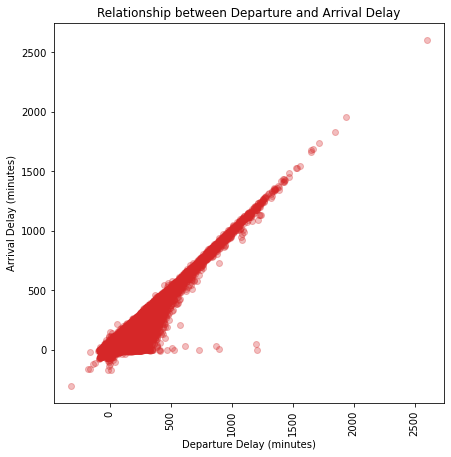

In [34]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data = flight_clean.query("Cancelled==0"), x="ArrDelay", y="DepDelay", alpha = 0.3, color = base_color)
plot_label("Relationship between Departure and Arrival Delay","Departure Delay (minutes)","Arrival Delay (minutes)")

> This plot shows a strong correlation for Departure and Arrival Delay when fights are not cancelled.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Interestingly distance and airtime of flights in 2007 were highly correlated. While distance was poorly related with other variables with a poor negative correlation with Weather Delay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Also the graph checking the relationship between arrival and departure delays when there were no flights cancelations had a linear relationship.
The study also found Arrival and Departure delays to be highly correlated. Thus the Arrival and Departure of flights had a positively high correlation. Other variables such as flight Carrier Delay and Late Air Craft Delay had a good relationship with Arrival and Departure delays


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question Twelve: What are the monthly trends in delay pattern and what type of delays are most frequent monthly?

In [35]:
#Creating dataframes that will group each delay by month and calculate average delay for each
Monthly_CarrierDelay =flight_clean.query("CarrierDelay>0").groupby("Month")["CarrierDelay"].mean().reset_index(name="CarrierDelay")
Monthly_WeatherDelay =flight_clean.query("WeatherDelay>0").groupby("Month")["WeatherDelay"].mean().reset_index(name="WeatherDelay")
Monthly_SecurityDelay =flight_clean.query("SecurityDelay>0").groupby("Month")["SecurityDelay"].mean().reset_index(name="SecurityDelay")
Monthly_LateAircraftDelay =flight_clean.query("LateAircraftDelay>0").groupby("Month")["LateAircraftDelay"].mean().reset_index(name="LateAircraftDelay")
Monthly_DepDelay =flight_clean.query("DepDelay>0").groupby("Month")["DepDelay"].mean().reset_index(name="DepDelay")
Monthly_ArrDelay =flight_clean.query("ArrDelay>0").groupby("Month")["ArrDelay"].mean().reset_index(name="ArrDelay")

In [37]:
#Joining all these dataframes into one
Merger = Monthly_CarrierDelay.merge(Monthly_WeatherDelay,on="Month")
Merger = Merger.merge(Monthly_SecurityDelay,on="Month")
Merger = Merger.merge(Monthly_LateAircraftDelay,on="Month")
Merger = Merger.merge(Monthly_DepDelay, on="Month")
Monthly_Delays = Merger.merge(Monthly_ArrDelay, on="Month")

In [38]:
#Reindexing the data
Monthly_Delays = Monthly_Delays.reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])

In [39]:
#using the melt function to arrange the data for easy plots
Monthly_Melt = pd.melt(Monthly_Delays, id_vars=["Month"], value_vars=["CarrierDelay", "WeatherDelay", "SecurityDelay", "LateAircraftDelay", "ArrDelay", "DepDelay"])

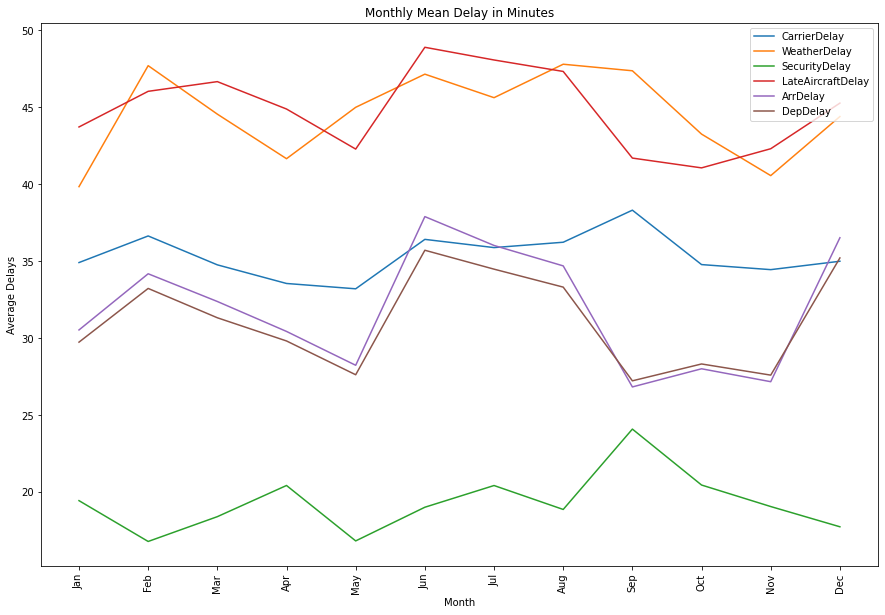

In [40]:
#Define line plot

plt.figure(figsize=(15,10))
c = sns.lineplot(data = Monthly_Melt, x = "Month", y = "value", hue="variable" )
plt.legend(loc = "upper right")
plot_label("Monthly Mean Delay in Minutes", "Month", "Average Delays")
plt.show();


> It is clear from the graph above that monthly delays caused by weather and late air craft have a greater overall impact than delays caused by other factors. Additionally, it can be seen that the delays vary greatly from month to month while the least frequent and least variable delays are those brought on by security concerns.

> The results of multivariate analysis support the conclusion that monthly delays were primarily caused by the weather and late air craft delays.

### Question Thirteen: What are the weekly trends in delay pattern and what type of delays are most frequent weekly?

In [41]:
Week_CarrierDelay = flight_clean.query("CarrierDelay>0").groupby("DayOfWeek")["CarrierDelay"].mean().reset_index(name = "CarrierDelay")
Week_WeatherDelay = flight_clean.query("WeatherDelay>0").groupby("DayOfWeek")["WeatherDelay"].mean().reset_index(name = "WeatherDelay")
Week_SecurityDelay = flight_clean.query("SecurityDelay>0").groupby("DayOfWeek")["SecurityDelay"].mean().reset_index(name = "SecurityDelay")
Week_LateAircraftDelay = flight_clean.query("LateAircraftDelay>0").groupby("DayOfWeek")["LateAircraftDelay"].mean().reset_index(name = "LateAircraftDelay")
Week_DepDelay = flight_clean.query("DepDelay>0").groupby("DayOfWeek")["DepDelay"].mean().reset_index(name = "DepDelay")
Week_ArrDelay = flight_clean.query("ArrDelay>0").groupby("DayOfWeek")["ArrDelay"].mean().reset_index(name = "ArrDelay")

In [42]:
#Joining all these dataframes into one
Week_Merger = Week_CarrierDelay.merge(Week_WeatherDelay, on = "DayOfWeek")
Week_Merger= Week_Merger.merge(Week_SecurityDelay, on = "DayOfWeek")
Week_Merger = Week_Merger.merge(Week_LateAircraftDelay, on = "DayOfWeek")
Week_Merger = Week_Merger.merge(Week_DepDelay, on = "DayOfWeek")
Weekly_Delays = Week_Merger.merge(Week_ArrDelay, on = "DayOfWeek")

In [43]:
#reindexing the weekly data
Weekly_Delays = Weekly_Delays.reindex([1,5,6,4,0,2,3])

In [44]:
#Melt the data
Weekly_Melt = pd.melt(Weekly_Delays, id_vars=["DayOfWeek"], value_vars=["CarrierDelay", "WeatherDelay", "SecurityDelay", "LateAircraftDelay", "ArrDelay", "DepDelay"])

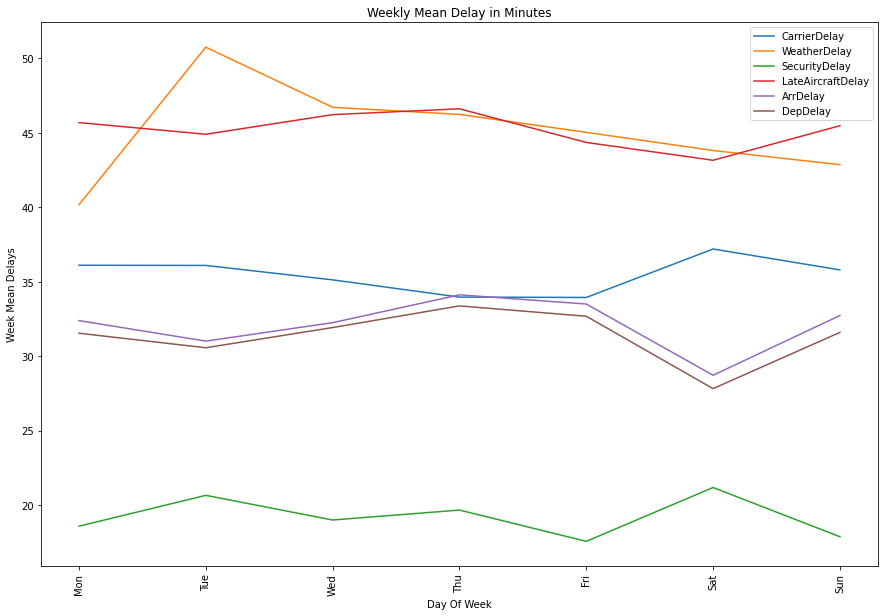

In [45]:

plt.figure(figsize=(15,10))
c = sns.lineplot(data = Weekly_Melt, x = "DayOfWeek", y = "value", hue="variable" )
plt.legend(loc = "upper right")

plot_label("Weekly Mean Delay in Minutes", "Day Of Week", "Week Mean Delays")
plt.show()

> just like in the previous chart weekly delays caused by weather and late air craft also have a greater overall impact than delays caused by other factors.
The results of multivariate analysis support the conclusion also that weekly delays were primarily caused by the weather and late air craft delays.

### Question Fourteen: What is the relationship between Monthy flights, Distance covered and the reasons for Cancellation?

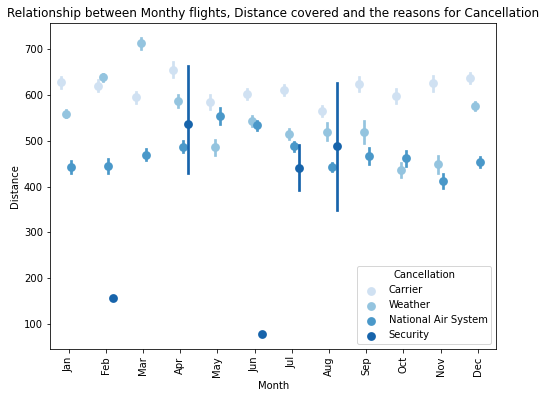

In [46]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = flight_clean, x = 'Month', y = 'Distance', hue = 'Cancellation',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plot_label("Relationship between Monthy flights, Distance covered and the reasons for Cancellation","Month","Distance")
plt.show();

> The graph shows that their is a week if not even negative relationship between Monthy flights, Distance covered and the reasons for Cancellation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is clear from the graph above that most delays were caused by weather and late air craft and they had a greater overall impact than delays caused by other factors. It was seen that the least frequent and least variable weekly delays are those brought on by security concerns which is almost same with the 

> The results of multivariate analysis support the conclusion that weekly delays were primarily caused by the weather and late air craft delays same as that of the montly delays and we can draw a connection as they are time dependent.

### Were there any interesting or surprising interactions between features?

> `Arrival Delay` and `Departure Delay` in both weekly and montly trends had similar and closely related trend.

## Conclusions
##### These are the few steps taken in the analysis process.
- First step taken during the Data Exploration was to import the data, view the data in other to understand the features of the data set

- Second step was the data cleaning phase and wrangling.

- Third step was to start asking questions and making well informed plots resulting from the type of the data and the question asked. The charts started with the univariate plots werein when neccessary transfomations were made.

- Next was the Bivariate and Multivariate chart where multiple variables and features of interest were explored to seek answers to the questions raised.

- The plots comprises of charts from `Matplotlib` and `Seaborn` libraries as the plots consist of `Barplots`, `scatterplot`, `pairplot`, `histogram` etc. 

##### The conclusion from the analysis carried out

- Cancellation made because of `Carrier(s)` had the most followed by `Weather`, `National Air System` and `Security` respectively

- Their seem to be a very close range between the top three months with most flights. Also the August holiday period seem to have the highest flights counts as people will tend to spend the long holiday relaxing in diferent locations. Its also noticable that December was amongst the buttom four as I myself was expecting higher travels during that period in the calender.

- `Monday` had the highest flight activity followed by `Friday` and `Thursday` while most flight cancellations from were on `Wednesday` from the 2007 data collected.

- Their is a strong correlation for Departure and Arrival Delay when fights are not cancelled.

- The study found a that the relationship between the `Distance` and `Airtime` of flights were seen to be near perfect. There were also noticable positive corellation between `Arival` and `Depature` delay and also `Late Air Craft Delay` also had a positive correlation with `Arival` and `Depature` delay.

- The graph shows that their is a week if not even negative relationship between Monthy flights, Distance covered and the reasons for Cancellation.
